In [1]:
import sys
import numpy
import argparse
from dataset import Dataset
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt

In [2]:
dataset = 'vgg16-cg.pkl'

In [3]:
ds = Dataset()
X, y, list_fams, no_imgs = ds.load(dataset)

In [4]:
# Create stratified k-fold subsets
kfold = 10  # no. of folds
skf = StratifiedKFold(kfold, shuffle=True,random_state=1)
skfind = [None] * kfold  # skfind[i][0] -> train indices, skfind[i][1] -> test indices
cnt = 0
for index in skf.split(X, y):
    skfind[cnt] = index
    cnt += 1

In [5]:
# Supervised Classification with SVM
conf_mat = numpy.zeros((len(list_fams),len(list_fams))) # Initializing the Confusion Matrix
for i in range(kfold):
    clf = svm.LinearSVC()
    train_indices = skfind[i][0]
    test_indices = skfind[i][1]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    clf.fit(X_train,y_train)  # Training
    y_predict = clf.predict(X_test)  # Testing
    print("[%d] Test acurracy: %.4f" %(i,accuracy_score(y_test,y_predict)))
    cm = confusion_matrix(y_test,y_predict)  # Compute confusion matrix for this fold
    conf_mat = conf_mat + cm  # Compute global confusion matrix

[0] Test acurracy: 0.8830
[1] Test acurracy: 0.8781
[2] Test acurracy: 0.8726
[3] Test acurracy: 0.8726
[4] Test acurracy: 0.8829
[5] Test acurracy: 0.8774
[6] Test acurracy: 0.8719
[7] Test acurracy: 0.8877
[8] Test acurracy: 0.8780
[9] Test acurracy: 0.8780


In [6]:
# Computing the average accuracy
avg_acc = numpy.trace(conf_mat)/sum(no_imgs)
print("Average acurracy: %.4f" %(avg_acc))

Average acurracy: 0.8782


In [7]:
# Viewing the confusion matrix
conf_mat = conf_mat.T  # since rows and cols are interchangeable
conf_mat_norm = conf_mat/no_imgs  # Normalizing the confusion matrix

Plotting the confusion matrix


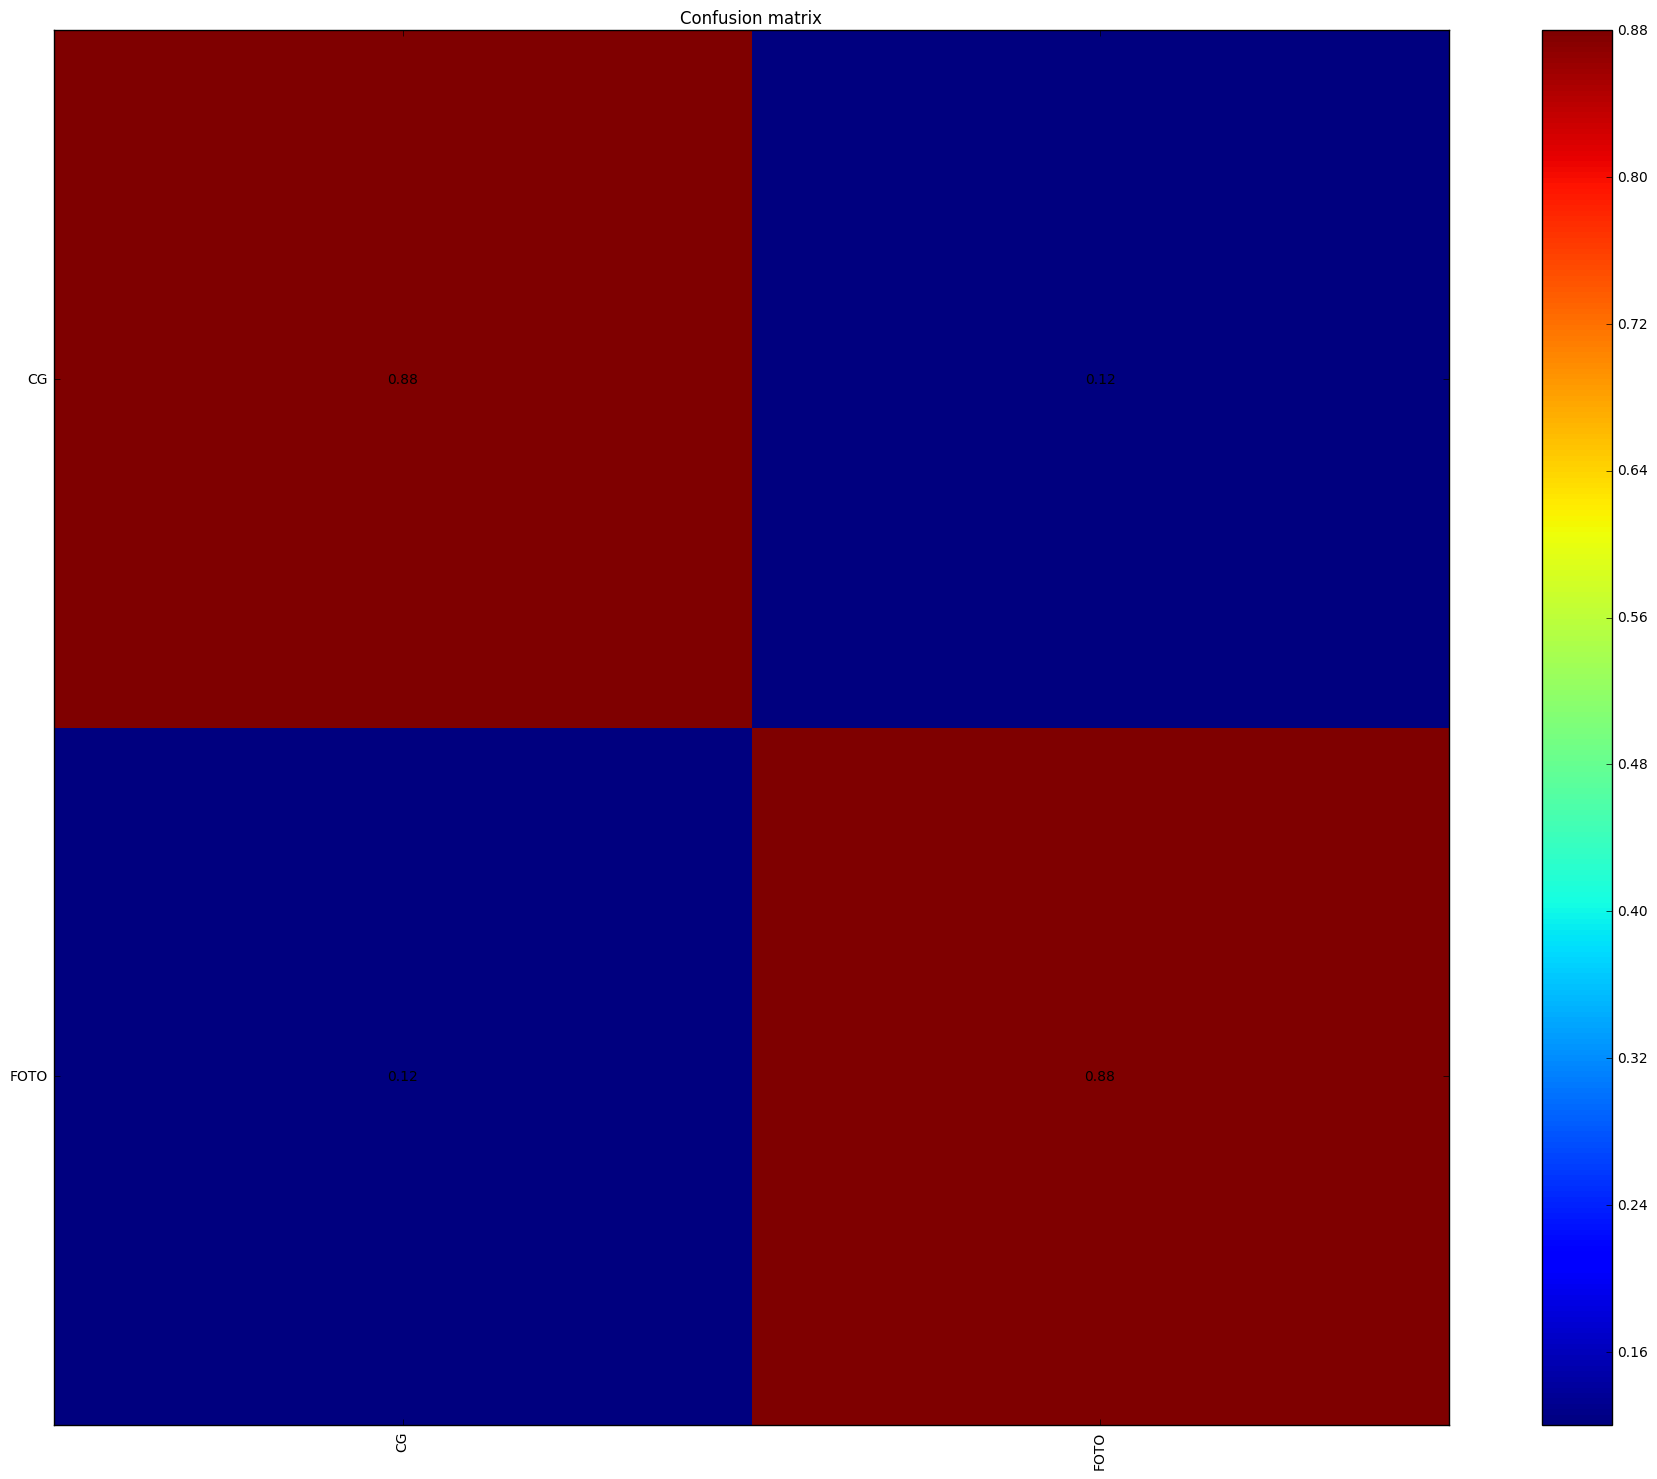

In [8]:
print("Plotting the confusion matrix")
conf_mat = numpy.around(conf_mat_norm,decimals=2)  # rounding to display in figure
figure = plt.gcf()
figure.set_size_inches(24, 18)
plt.imshow(conf_mat,interpolation='nearest')
for row in xrange(len(list_fams)):
    for col in xrange(len(list_fams)):
        plt.annotate(str(conf_mat[row][col]),xy=(col,row),ha='center',va='center')
plt.xticks(range(len(list_fams)),list_fams,rotation=90,fontsize=10)
plt.yticks(range(len(list_fams)),list_fams,fontsize=10)
plt.title('Confusion matrix')
plt.colorbar()
plt.show()